In [1]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from matplotlib import pyplot as plt

from statsmodels.tsa.vector_ar.vecm import VECM, select_coint_rank, select_order

In [2]:
nome1 = 'AMZN'
nome2 = 'GOOG'

acao1 = pd.read_csv(fr'data\{nome1}.csv', index_col=0)
acao1.index = pd.to_datetime(acao1.index)

acao2 = pd.read_csv(fr'data\{nome2}.csv', index_col=0)
acao2.index = pd.to_datetime(acao2.index)

df_pair = pd.concat((np.log(acao1.Close.rename(nome1)),np.log(acao2.Close.rename(nome2))), axis=1)
df_pair = df_pair.dropna()


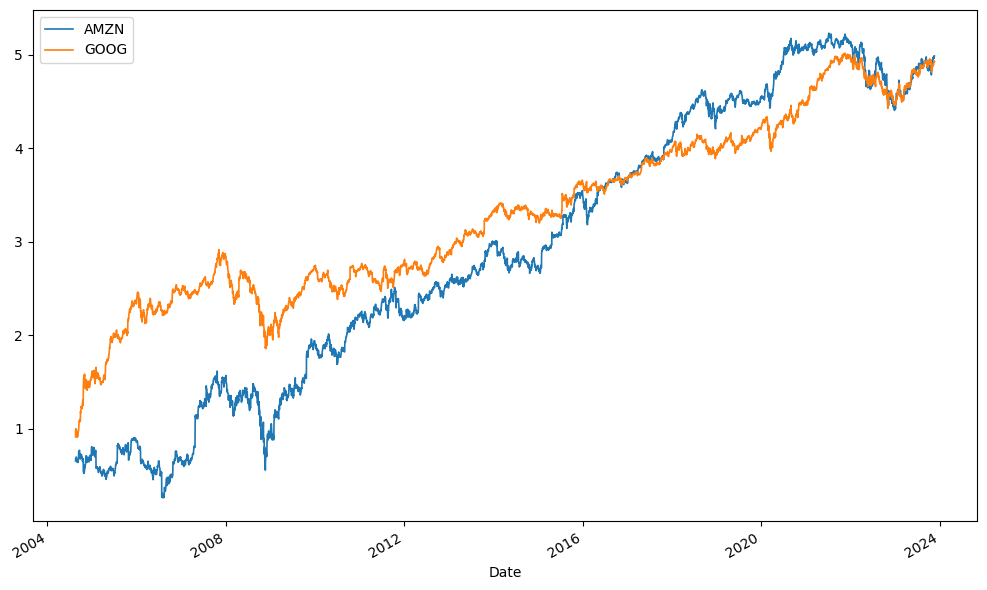

In [3]:
df_pair.plot(figsize=(10,6),  linewidth=1.2)
plt.tight_layout()

<AxesSubplot: xlabel='Date'>

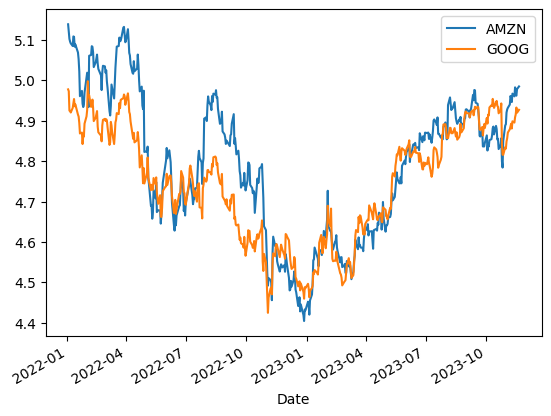

In [4]:
df_pair = df_pair['2022':]
df_pair.plot()

In [8]:
###### Check Stationarity ###########
from utils import adf_test, kpss_test

for i in df_pair.columns:
    adf = adf_test(df_pair[i])
    kpss = kpss_test(df_pair[i])


c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 

,Test_Type,Test_Statistic,Critical_Value,p-value,Used_lags,Conclusion
0,Constant,0.85,0.46,0.01,12,Non-Stationary
1,Constant/Trend,0.85,0.15,0.01,12,Non-Stationary


In [10]:
adf, kpss

(        Test_Type  Test_Statistic  Critical_Value  p-value Used_lags  \
 0            None           -0.16           -1.94     0.63         0   
 1        Constant           -1.89           -2.87     0.34         0   
 2  Constant/Trend           -1.90           -3.42     0.66         0   
 
        Conclusion  
 0  Non-Stationary  
 1  Non-Stationary  
 2  Non-Stationary  ,
         Test_Type  Test_Statistic  Critical_Value  p-value Used_lags  \
 0        Constant            0.85            0.46     0.01        12   
 1  Constant/Trend            0.85            0.15     0.01        12   
 
        Conclusion  
 0  Non-Stationary  
 1  Non-Stationary  )

In [11]:
from utils import adf_test, kpss_test

for i in df_pair.columns:
    diff_adf = adf_test(df_pair[i].diff().dropna())
    diff_kpss = kpss_test(df_pair[i].diff().dropna())

c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_ = kpss(x, regression=regression_type)
c:\Users\vnaza\OneDrive\Documentos\Projetos\VAR\utils.py:186: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 

In [13]:
diff_adf, diff_kpss

(        Test_Type  Test_Statistic  Critical_Value  p-value Used_lags  \
 0            None          -21.66           -1.94     0.00         0   
 1        Constant          -21.64           -2.87     0.00         0   
 2  Constant/Trend          -21.71           -3.42     0.00         0   
 
    Conclusion  
 0  Stationary  
 1  Stationary  
 2  Stationary  ,
         Test_Type  Test_Statistic  Critical_Value  p-value Used_lags  \
 0        Constant            0.29            0.46     0.10         5   
 1  Constant/Trend            0.03            0.15     0.10         5   
 
    Conclusion  
 0  Stationary  
 1  Stationary  )

In [14]:
import warnings
warnings.filterwarnings('ignore')

order = select_order(df_pair, deterministic='n', maxlags=10)
order.selected_orders

{'aic': 3, 'bic': 0, 'hqic': 0, 'fpe': 3}

In [15]:
# Estatística do Traço
rank_test = select_coint_rank(endog=df_pair,det_order= -1,k_ar_diff=3, method='trace',
                              signif=0.05)
rank_test.summary()

r_0,r_1,test statistic,critical value
0,2,13.06,12.32
1,2,0.005327,4.130


In [16]:
# Estatística do Máximo Autovalor
rank_test = select_coint_rank(endog=df_pair,det_order= -1,k_ar_diff=3, method='maxeig',
                              signif=0.05)
rank_test.summary()

r_0,r_1,test statistic,critical value
0,1,13.06,11.22
1,2,0.005327,4.130


In [17]:
vecm = VECM(df_pair, coint_rank=1, # 1 relação de cointegração de acordo com o teste de Johansen
            k_ar_diff=3, #3 lags autoregressivos
            deterministic = 'co' #constante
            ).fit()


In [18]:
# Teste de Autocorrelação dos Resíduos
ljungbox = vecm.test_whiteness()
ljungbox.summary()

Test statistic,Critical value,p-value,df
21.39,38.89,0.721,26


In [19]:
# Teste de Normalidade dos Resíduos
ljungbox = vecm.test_normality()
ljungbox.summary()

Test statistic,Critical value,p-value,df
573.4,9.488,0.000,4


In [20]:
vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.0342,0.011,-3.131,0.002,-0.056,-0.013
L1.AMZN,0.1124,0.064,1.766,0.077,-0.012,0.237
L1.GOOG,-0.2093,0.079,-2.666,0.008,-0.363,-0.055
L2.AMZN,0.0072,0.063,0.114,0.909,-0.117,0.131
L2.GOOG,0.0246,0.078,0.316,0.752,-0.128,0.178
L3.AMZN,0.1244,0.063,1.968,0.049,0.001,0.248
L3.GOOG,-0.2237,0.079,-2.849,0.004,-0.378,-0.070
,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.0067,0.009,-0.737,0.461,-0.024,0.011
L1.AMZN,0.0391,0.053,0.744,0.457,-0.064,0.142


In [21]:
spread = df_pair['AMZN'] -1.1483*df_pair['GOOG']

<AxesSubplot: xlabel='Date'>

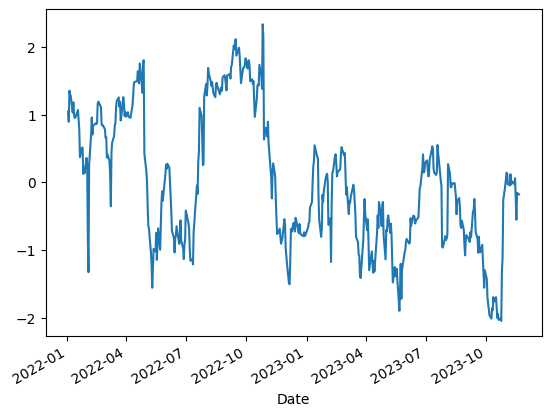

In [22]:
std_spread = (spread - spread.mean())/spread.std()
std_spread.plot()

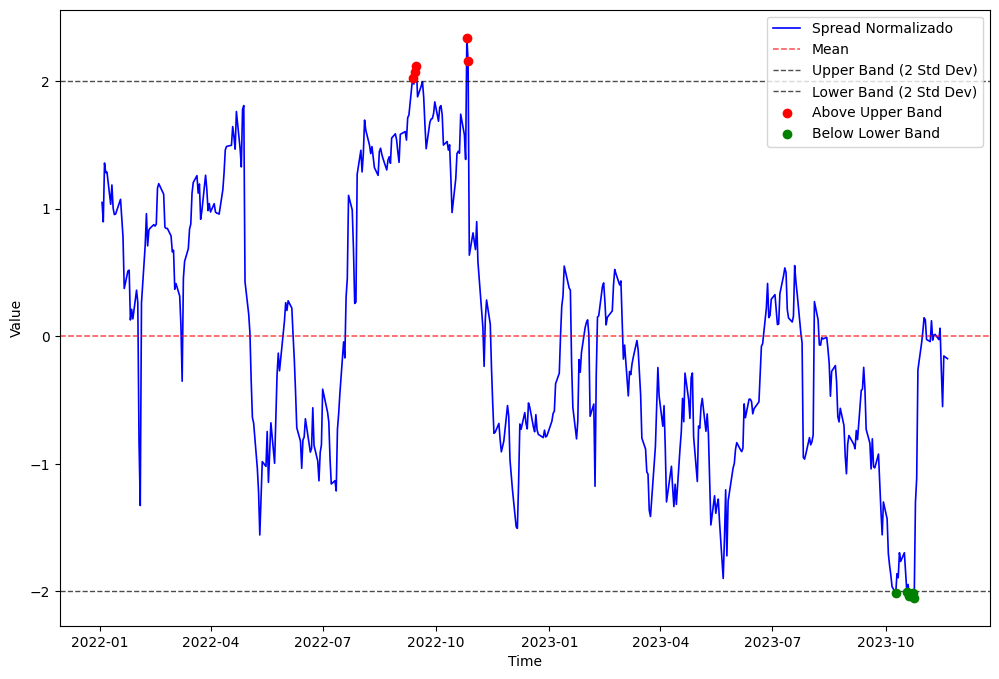

In [23]:
mean_value = np.mean(std_spread)
std_dev = np.std(std_spread)

# Define the upper and lower bands based on the standard deviation
upper_band = mean_value + 2 * std_dev
lower_band = mean_value - 2 * std_dev

# Identify values above and below bands
above_upper_band = std_spread > upper_band
below_lower_band = std_spread < lower_band


plt.figure(figsize=(12,8))


# Plot the time series
plt.plot(std_spread,label='Spread Normalizado', color='blue', linewidth=1.2,zorder=-1)

# Plot the mean line
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean', linewidth=1.1, alpha=0.7)

# Plot the upper and lower bands
plt.axhline(y=upper_band, color='k', linestyle='--', label='Upper Band (2 Std Dev)', linewidth=1.0, alpha=0.7)
plt.axhline(y=lower_band, color='k', linestyle='--', label='Lower Band (2 Std Dev)', linewidth=1.0, alpha=0.7)

# Mark points above and below bands
plt.scatter(std_spread[above_upper_band].index, std_spread[above_upper_band], color='red', label='Above Upper Band', zorder=2)
plt.scatter(std_spread[below_lower_band].index, std_spread[below_lower_band], color='green', label='Below Lower Band', zorder=2)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.show()
